In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [41]:
df = pd.read_csv('dataset_clean.csv')

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
RSEED = 101

In [44]:
df.columns

Index(['Unnamed: 0', 'price', 'res_load', 'temp', 'wind', 'gen_total',
       'gen_bio', 'gen_hyd', 'gen_windoff', 'gen_windon', 'gen_pv',
       'gen_reother', 'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas',
       'gen_pump', 'gen_other', 'gen_f_total', 'gen_f_windoff', 'gen_f_windon',
       'gen_f_pv', 'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'mres-',
       'sres+', 'sres-', 'FF', 'PEGAS DE M1 DAILY EGIX',
       'API4 front year, USD/t', 'gen_delta', 'gen_windoff_delta',
       'gen_windon_delta', 'gen_pv_delta', 'dm_delta', 'dm_gen_delta',
       'dm_gen_ratio', 'day', 'weekend', 'month', 'season', 'hour', 'peak',
       'lag1', 'price_change', 'price_diff', 'price_diff_pos', 'price_pos',
       'price_diff_bins'],
      dtype='object')

In [92]:
X1 = df[['res_load', 'temp', 'wind', 'gen_total',
       'gen_bio', 'gen_hyd', 'gen_windoff', 'gen_windon',
       'gen_reother', 'gen_nuc', 'gen_bcoal', 'gen_hcoal', 'gen_gas',
       'gen_pump', 'gen_other', 'gen_f_total', 'gen_f_windoff', 'gen_f_windon',
       'gen_f_other', 'dm', 'dm_f', 'netex', 'mres+', 'mres-',
       'sres+', 'sres-', 'FF', 'PEGAS DE M1 DAILY EGIX',
       'API4 front year, USD/t', 'gen_delta', 'gen_windoff_delta',
       'gen_windon_delta', 'dm_delta', 'dm_gen_delta',
       'dm_gen_ratio', 'weekend', 'month',  'hour']]

In [93]:
X = X1
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED)

## Scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest Regressor

In [95]:
rfr = RandomForestRegressor(random_state=RSEED, n_estimators=100)
rfr.fit(X_train, y_train)
predictions = rfr.predict(X_test)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Explained Variance Score
evs = explained_variance_score(predictions, y_test)

# Print metrics
print('Mean Absolute Error:', round(mae, 5))
print('Mean Squared Error:', round(mse, 5))
print('R-squared scores:', round(r2, 5))
print('Explained Variance Score:', round(evs, 5))

Mean Absolute Error: 2.69227
Mean Squared Error: 23.74911
R-squared scores: 0.9321
Explained Variance Score: 0.91821


## Hyperparameter Tuning via Randomized Search

In [97]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.linspace(80, 120).astype(int),
    'max_depth': [None] + list(np.linspace(3, 8).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.3, 1.0, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 20, 500).astype(int)),
    'min_samples_split': [10, 15],
    'bootstrap': [True, False]
 }

pre_gs_inst = RandomizedSearchCV(RandomForestRegressor(random_state=RSEED),
param_distributions = param_dist,
cv=3,
n_iter = 10,
n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [98]:
pre_gs_inst.best_params_

{'n_estimators': 97,
 'min_samples_split': 10,
 'max_leaf_nodes': 19,
 'max_features': 0.9000000000000001,
 'max_depth': 5,
 'bootstrap': True}

### Best Model

In [99]:
rfr_best = RandomForestRegressor(random_state=RSEED,
 n_estimators=91,
 min_samples_split=10,
 max_leaf_nodes=15,
 max_features=0.4,
 max_depth=5,
 bootstrap=False)
                   
rfr_best.fit(X_train, y_train)
predictions = rfr_best.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Explained Variance Score
evs = explained_variance_score(predictions, y_test)

# Print metrics
print('Mean Absolute Error:', round(mae, 5))
print('Mean Squared Error:', round(mse, 5))
print('R-squared scores:', round(r2, 5))
print('Explained Variance Score:', round(evs, 5))

Mean Absolute Error: 4.33117
Mean Squared Error: 47.10258
R-squared scores: 0.86532
Explained Variance Score: 0.79002


## Feature Importance

In [101]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:7]]
    values = importances[indices][:7]

    # Creat the plot
    fig = plt.figure(figsize = (15,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(7), values, width = 0.5, align="center", color = '#FF4343', \
          label = "Feature Weight")
    plt.bar(np.arange(7) - 0.3, np.cumsum(values), width = 0.5, align = "center", color = 'k', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=70)
    plt.xlim((-0.5, 6.5))
    plt.ylabel("Weight", fontsize = 16)
    plt.xlabel("Feature", fontsize = 16)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('font', size=16)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


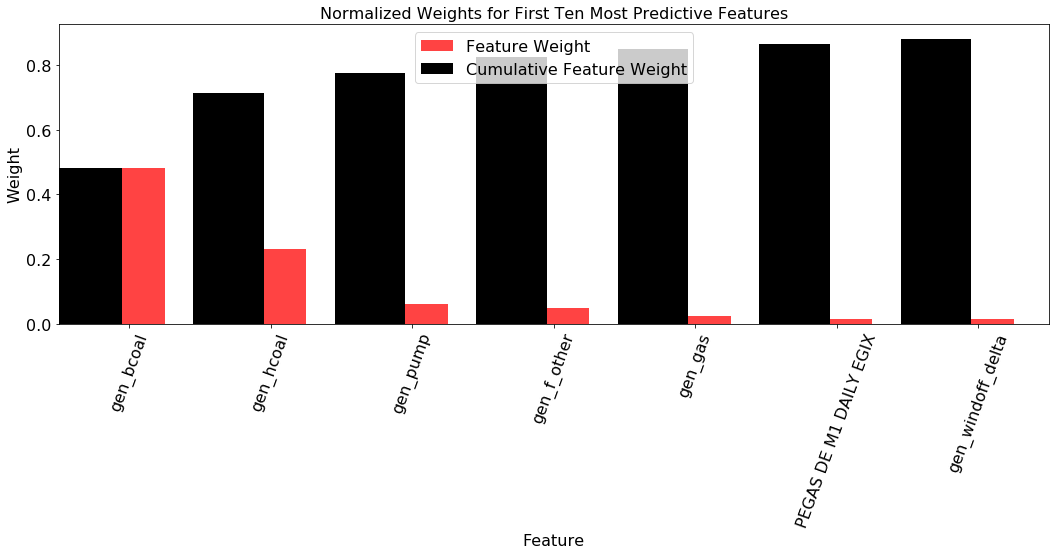

In [102]:
# TODO: Train the supervised model on the training set 
model = RandomForestRegressor().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)